# Sales Data Analysis
Analyzing monthly product sales in 3 different ways. 

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/Course/Hands on Data Science Project/Exercise Files 3/MonthlyProductSales.csv', 
                 encoding = 'ISO-8859-1')

## Inspecting Data

In [ ]:
df.head()

,Month of Order Date,Product Name,Sales
0,2013-05-01,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",208.0
1,2015-06-01,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",208.0
2,2013-11-01,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",333.0
3,2016-07-01,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",416.0
4,2016-11-01,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",500.0


In [23]:
df.tail()

,Month of Order Date,Product Name,Sales
9247,2016-06-01,Zipper Ring Binder Pockets,6.0
9248,2016-07-01,Zipper Ring Binder Pockets,10.0
9249,2013-04-01,Zipper Ring Binder Pockets,14.0
9250,2016-12-01,Zipper Ring Binder Pockets,15.0
9251,2013-07-01,Zipper Ring Binder Pockets,16.0


In [24]:
df.describe()

,Sales
count,9252.000000
mean,248.308798
std,669.441779
min,0.000000
25%,18.000000
50%,60.000000
75%,222.000000
max,22638.000000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9252 entries, 0 to 9251
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Month of Order Date  9252 non-null   object 
 1   Product Name         9252 non-null   object 
 2   Sales                9252 non-null   float64
dtypes: float64(1), object(2)
memory usage: 217.0+ KB


In [ ]:
s = df['Product Name']

s.value_counts(dropna = False)

Easy-staple paper                                                   32
Staple envelope                                                     30
Staples                                                             30
Staples in misc. colors                                             18
Storex Dura Pro Binders                                             14
                                                                    ..
Avery Hi-Liter Pen Style Six-Color Fluorescent Set                   1
Hewlett-Packard Desktjet 6988DT Refurbished Printer                  1
Eureka Hand Vacuum, Bagless                                          1
Epson WorkForce WF-2530 All-in-One Printer, Copier Scanner           1
Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac     1
Name: Product Name, Length: 1850, dtype: int64

## Aggregating Data

In [ ]:
df['Month of Order Date'].str[:4]

0       2013
1       2015
2       2013
3       2016
4       2016
        ... 
9247    2016
9248    2016
9249    2013
9250    2016
9251    2013
Name: Month of Order Date, Length: 9252, dtype: object

In [ ]:
df.groupby(df["Month of Order Date"].str[:4]).describe().reset_index().rename(columns={"Month of Order Date" : "Year"})

Year   Sales                                                          
          count        mean         std  min   25%   50%     75%      max
0  2013  1875.0  258.267200  803.537374  1.0  17.0  55.0  224.00  22638.0
1  2014  1968.0  239.107215  521.330289  1.0  19.0  62.0  225.25   7312.0
2  2015  2400.0  253.550833  711.795040  1.0  19.0  58.5  222.00  17500.0
3  2016  3009.0  243.940512  627.741547  0.0  18.0  60.0  221.00  14000.0

In [ ]:
yearly_product_sales = df.groupby([df["Month of Order Date"].str[:4], "Product Name"]).sum().reset_index()

In [ ]:
yearly_product_sales.rename(columns={"Month of Order Date" : "Year"})

,Year,Product Name,Sales
0,2013,"#10 White Business Envelopes,4 1/8 x 9 1/2",156.0
1,2013,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",63.0
2,2013,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",23.0
3,2013,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",541.0
4,2013,1/4 Fold Party Design Invitations & White Enve...,6.0
...,...,...,...
5321,2016,iKross Bluetooth Portable Keyboard + Cell Phon...,67.0
5322,2016,iOttie HLCRIO102 Car Mount,120.0
5323,2016,iOttie XL Car Mount,224.0
5324,2016,invisibleSHIELD by ZAGG Smudge-Free Screen Pro...,205.0


In [ ]:
df.groupby("Product Name").sum().reset_index()

,Product Name,Sales
0,"""While you Were Out"" Message Book, One Form pe...",25.0
1,"#10 Gummed Flap White Envelopes, 100/Box",42.0
2,#10 Self-Seal White Envelopes,109.0
3,"#10 White Business Envelopes,4 1/8 x 9 1/2",489.0
4,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",286.0
...,...,...
1845,iKross Bluetooth Portable Keyboard + Cell Phon...,479.0
1846,iOttie HLCRIO102 Car Mount,216.0
1847,iOttie XL Car Mount,224.0
1848,invisibleSHIELD by ZAGG Smudge-Free Screen Pro...,442.0


In [ ]:
yearly_product_sales.to_csv("/content/gdrive/My Drive/Course/Hands on Data Science Project/Exercise Files 3/yearly_product_sales.csv", header=True, index=False, encoding="utf-8")

In [ ]:
yearly_product_sales.to_excel("/content/gdrive/My Drive/Course/Hands on Data Science Project/Exercise Files 3/yearly_product_sales.xlsx", header=True, index=False)

## Visualizing Data

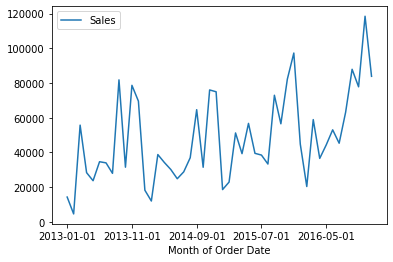

In [ ]:
df.groupby(df["Month of Order Date"]).sum().plot()

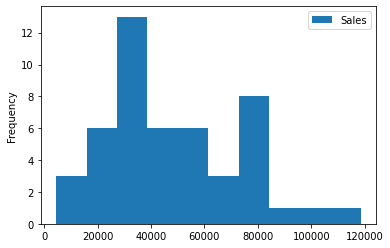

In [21]:
df.groupby(df["Month of Order Date"]).sum().plot(kind="hist", bins=10)

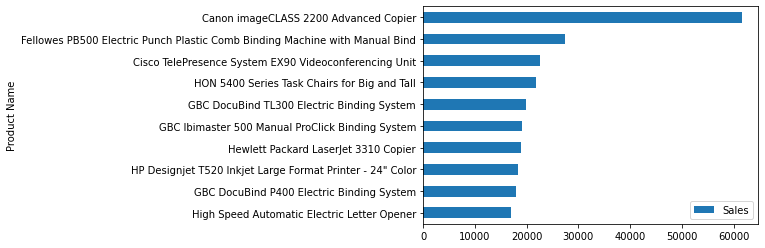

In [22]:
df.groupby(df["Product Name"]).sum().sort_values(by="Sales").tail(10).plot(kind="barh")